In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

### Data visualization

In [2]:
data = pd.read_csv('Task 3 and 4_Loan_Data.csv')

In [17]:
data[data.default == 0]

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
5,4661159,0,5376.886873,7189.121298,85529.84591,2,697,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


##### As the purpose here is to provide a yes/no output, a logistic regression is better suited than a simple one.

### Logistic regression

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
X = data.drop(["default", "customer_id"], axis=1) 
y = data["default"]

In [6]:
# We clearly see that the explanatory variables are not on the same scale, so we have to standardize them

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Train and test datasets

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], shape=(3000,))

In [10]:
print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 0.9966666666666667


In [11]:
print("\nRapport de classification :\n", classification_report(y_test, y_pred))


Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2459
           1       1.00      0.98      0.99       541

    accuracy                           1.00      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000



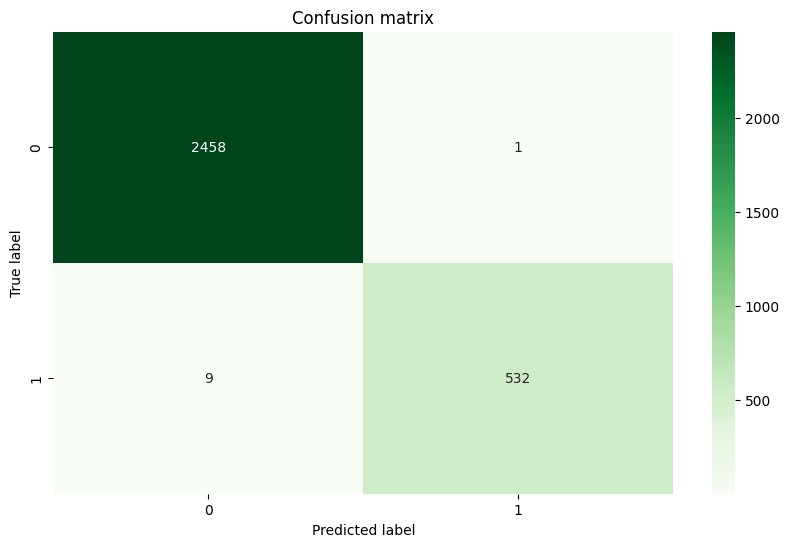

In [12]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6)) 
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [13]:
def expected_loss(features, model=model, scaler=scaler, recovery_rate=0.1):
    # Normalisation avec le scaler déjà entraîné
    scaled_features = scaler.transform([features])
    
    # Probabilité de défaut (classe = 1)
    prob_default = model.predict_proba(scaled_features)[:, 1][0]
    print("Default probability :", prob_default)
    
    return prob_default * (1 - recovery_rate) * features[1]

In [14]:
expected_loss([5,	3135.006926,	17054.77273,	59367.84811,	5, 707		])

Default probability : 0.9996835853288095


/opt/python/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(2820.613467432897)

In [15]:
expected_loss([0,	4766.648001,	2501.730397,	74356.88347,	5,	612	])

Default probability : 3.1416736841804735e-11


/opt/python/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(1.3477727327843842e-07)